In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import pandas as pd

from diffusing_neutrons import DiffusingNeutrons

In [16]:
def plot_trajectories(diffusing_neutrons):
    plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", fontsize=18)
    for neutron in diffusing_neutrons.neutrons:
        x, y, z = list(zip(*neutron.positions))
        plt.plot(x, y, z, c="C0")

    plt.plot(0, 0, 0, "o", c="r")
    plt.xlabel("$x(m)$", fontsize=16)
    plt.ylabel("$y(m)$", fontsize=16)
    plt.gca().set_box_aspect(aspect=None, zoom=0.9)
    plt.gca().set_zlabel("$z(m)$", fontsize=16)
    plt.show()

In [3]:
data = pd.read_csv("data/mean_free_path.csv")
mean_free_paths = list(data["lambda(m)"])
energies = list(data["Energy(eV)"])

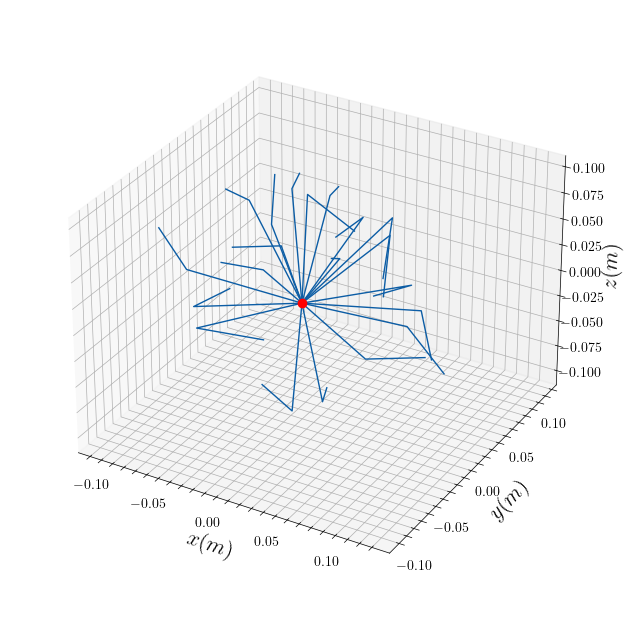

In [13]:
diffusing_neutrons = DiffusingNeutrons(nNeutrons=20, mean_free_paths=mean_free_paths, energies=energies)
diffusing_neutrons.diffuse(nCollisions=2)
plot_trajectories(diffusing_neutrons)

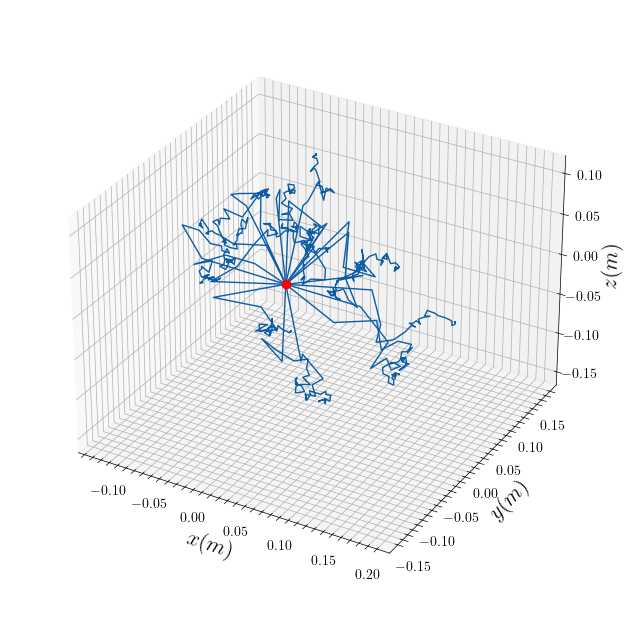

In [14]:
diffusing_neutrons.diffuse(nCollisions=50)
plot_trajectories(diffusing_neutrons)

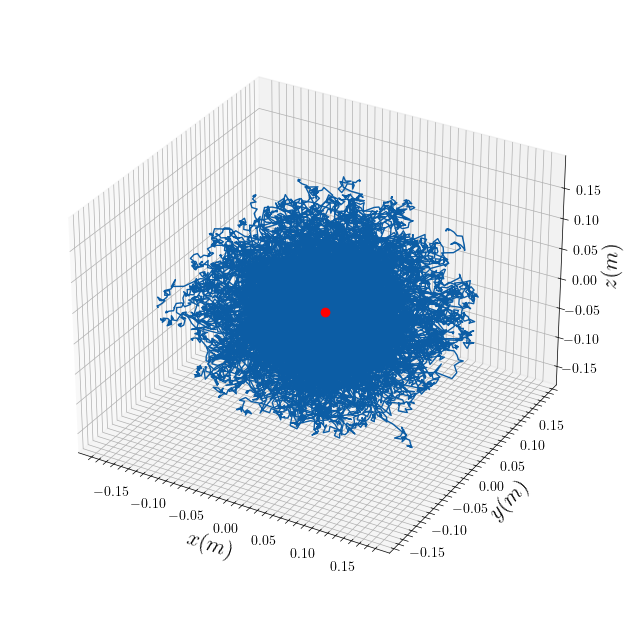

In [17]:
diffusing_neutrons = DiffusingNeutrons(nNeutrons=1000, mean_free_paths=mean_free_paths, energies=energies)
diffusing_neutrons.diffuse(nCollisions=30)
plot_trajectories(diffusing_neutrons)

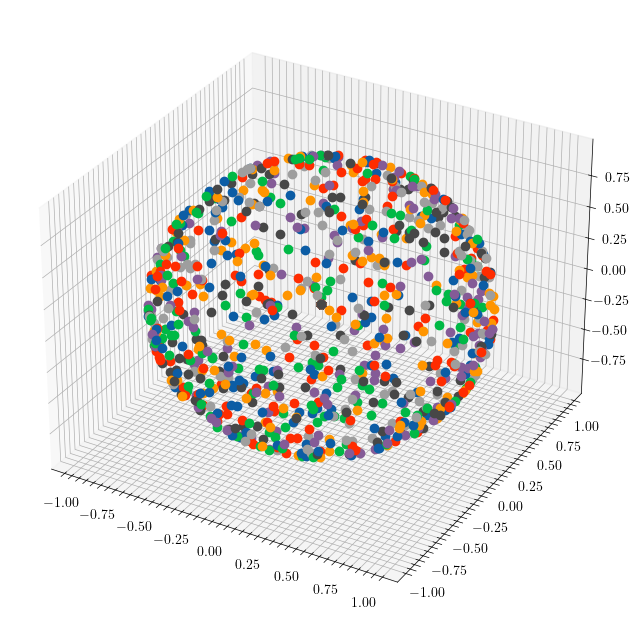

In [30]:
vecs = np.random.normal(size=(1000, 3))
mags = np.linalg.norm(vecs, axis=-1)
points = vecs / mags[..., np.newaxis]
plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
for e in points:
    plt.plot([0, e[0]], [0, e[1]], [0, e[2]], 'o')
plt.show()